In [3]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import seaborn as sns

## Read Data and divide genres into different columns

In [4]:
df = pd.read_csv('../tmdb_movies_data.csv')

In [5]:
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.000000e+00,0.000000e+00


In [6]:
df[['genres_1', 'genres_2', 'genres_3','genres_4', 'genres_5']] = df.genres.str.split("|", expand = True)
print(df)

           id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10861      21  tt0060371    0.080598          0           0   
10862   20379  tt0060472    0.065543          0           0   
10863   39768  tt0060161    0.065141          0           0   
10864   21449  tt0061177    0.064317          0           0   
10865   22293  tt0060666    0.035919      19000           0   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4                         Furious 7   
...      

## Data Exploration

In [7]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,10866.0,6.606418e+04,9.213014e+04,5.000000,10596.250000,20669.000000,7.561000e+04,4.178590e+05
popularity,10866.0,6.464410e-01,1.000185e+00,0.000065,0.207583,0.383856,7.138170e-01,3.298576e+01
budget,10866.0,1.462570e+07,3.091321e+07,0.000000,0.000000,0.000000,1.500000e+07,4.250000e+08
revenue,10866.0,3.982332e+07,1.170035e+08,0.000000,0.000000,0.000000,2.400000e+07,2.781506e+09
runtime,10866.0,1.020709e+02,3.138141e+01,0.000000,90.000000,99.000000,1.110000e+02,9.000000e+02
vote_count,10866.0,2.173897e+02,5.756191e+02,10.000000,17.000000,38.000000,1.457500e+02,9.767000e+03
vote_average,10866.0,5.974922e+00,9.351418e-01,1.500000,5.400000,6.000000,6.600000e+00,9.200000e+00
release_year,10866.0,2.001323e+03,1.281294e+01,1960.000000,1995.000000,2006.000000,2.011000e+03,2.015000e+03
budget_adj,10866.0,1.755104e+07,3.430616e+07,0.000000,0.000000,0.000000,2.085325e+07,4.250000e+08
revenue_adj,10866.0,5.136436e+07,1.446325e+08,0.000000,0.000000,0.000000,3.369710e+07,2.827124e+09


In [9]:
num_vars = df.columns[df.dtypes != 'object']
print(num_vars)

Index(['id', 'popularity', 'budget', 'revenue', 'runtime', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')


In [10]:
df_num = pd.DataFrame(df, columns = ['popularity', 'budget', 'revenue', 'runtime', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj'])

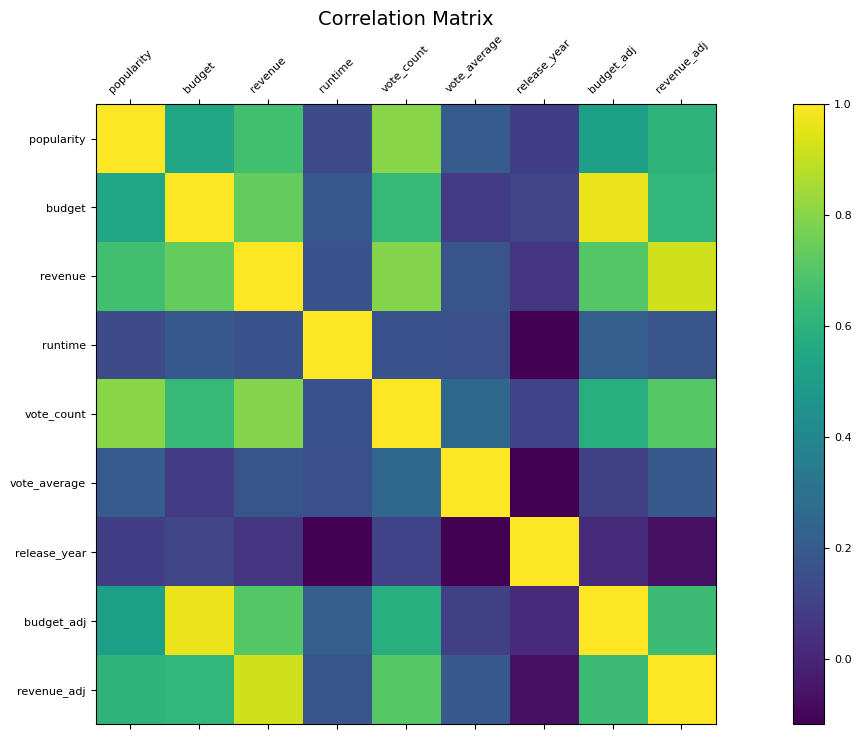

In [11]:
f = plt.figure(figsize=(20, 8))
plt.matshow(df_num.corr(), fignum=f.number)
plt.xticks(range(df_num.select_dtypes(['number']).shape[1]), df_num.select_dtypes(['number']).columns, fontsize=8, rotation=45)
plt.yticks(range(df_num.select_dtypes(['number']).shape[1]), df_num.select_dtypes(['number']).columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)
plt.title('Correlation Matrix', fontsize=14);

In [12]:
df_num.corr()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.545472,0.663358,0.139033,0.800828,0.209511,0.089801,0.513550,0.609083
budget,0.545472,1.000000,0.734901,0.191283,0.632702,0.081014,0.115931,0.968963,0.622505
revenue,0.663358,0.734901,1.000000,0.162838,0.791175,0.172564,0.057048,0.706427,0.919110
runtime,0.139033,0.191283,0.162838,1.000000,0.163278,0.156835,-0.117204,0.221114,0.175676
vote_count,0.800828,0.632702,0.791175,0.163278,1.000000,0.253823,0.107948,0.587051,0.707942
vote_average,0.209511,0.081014,0.172564,0.156835,0.253823,1.000000,-0.117632,0.093039,0.193085
release_year,0.089801,0.115931,0.057048,-0.117204,0.107948,-0.117632,1.000000,0.016793,-0.066256
budget_adj,0.513550,0.968963,0.706427,0.221114,0.587051,0.093039,0.016793,1.000000,0.646607
revenue_adj,0.609083,0.622505,0.919110,0.175676,0.707942,0.193085,-0.066256,0.646607,1.000000


array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'budget'}>,
        <Axes: title={'center': 'revenue'}>],
       [<Axes: title={'center': 'runtime'}>,
        <Axes: title={'center': 'vote_count'}>,
        <Axes: title={'center': 'vote_average'}>],
       [<Axes: title={'center': 'release_year'}>,
        <Axes: title={'center': 'budget_adj'}>,
        <Axes: title={'center': 'revenue_adj'}>]], dtype=object)

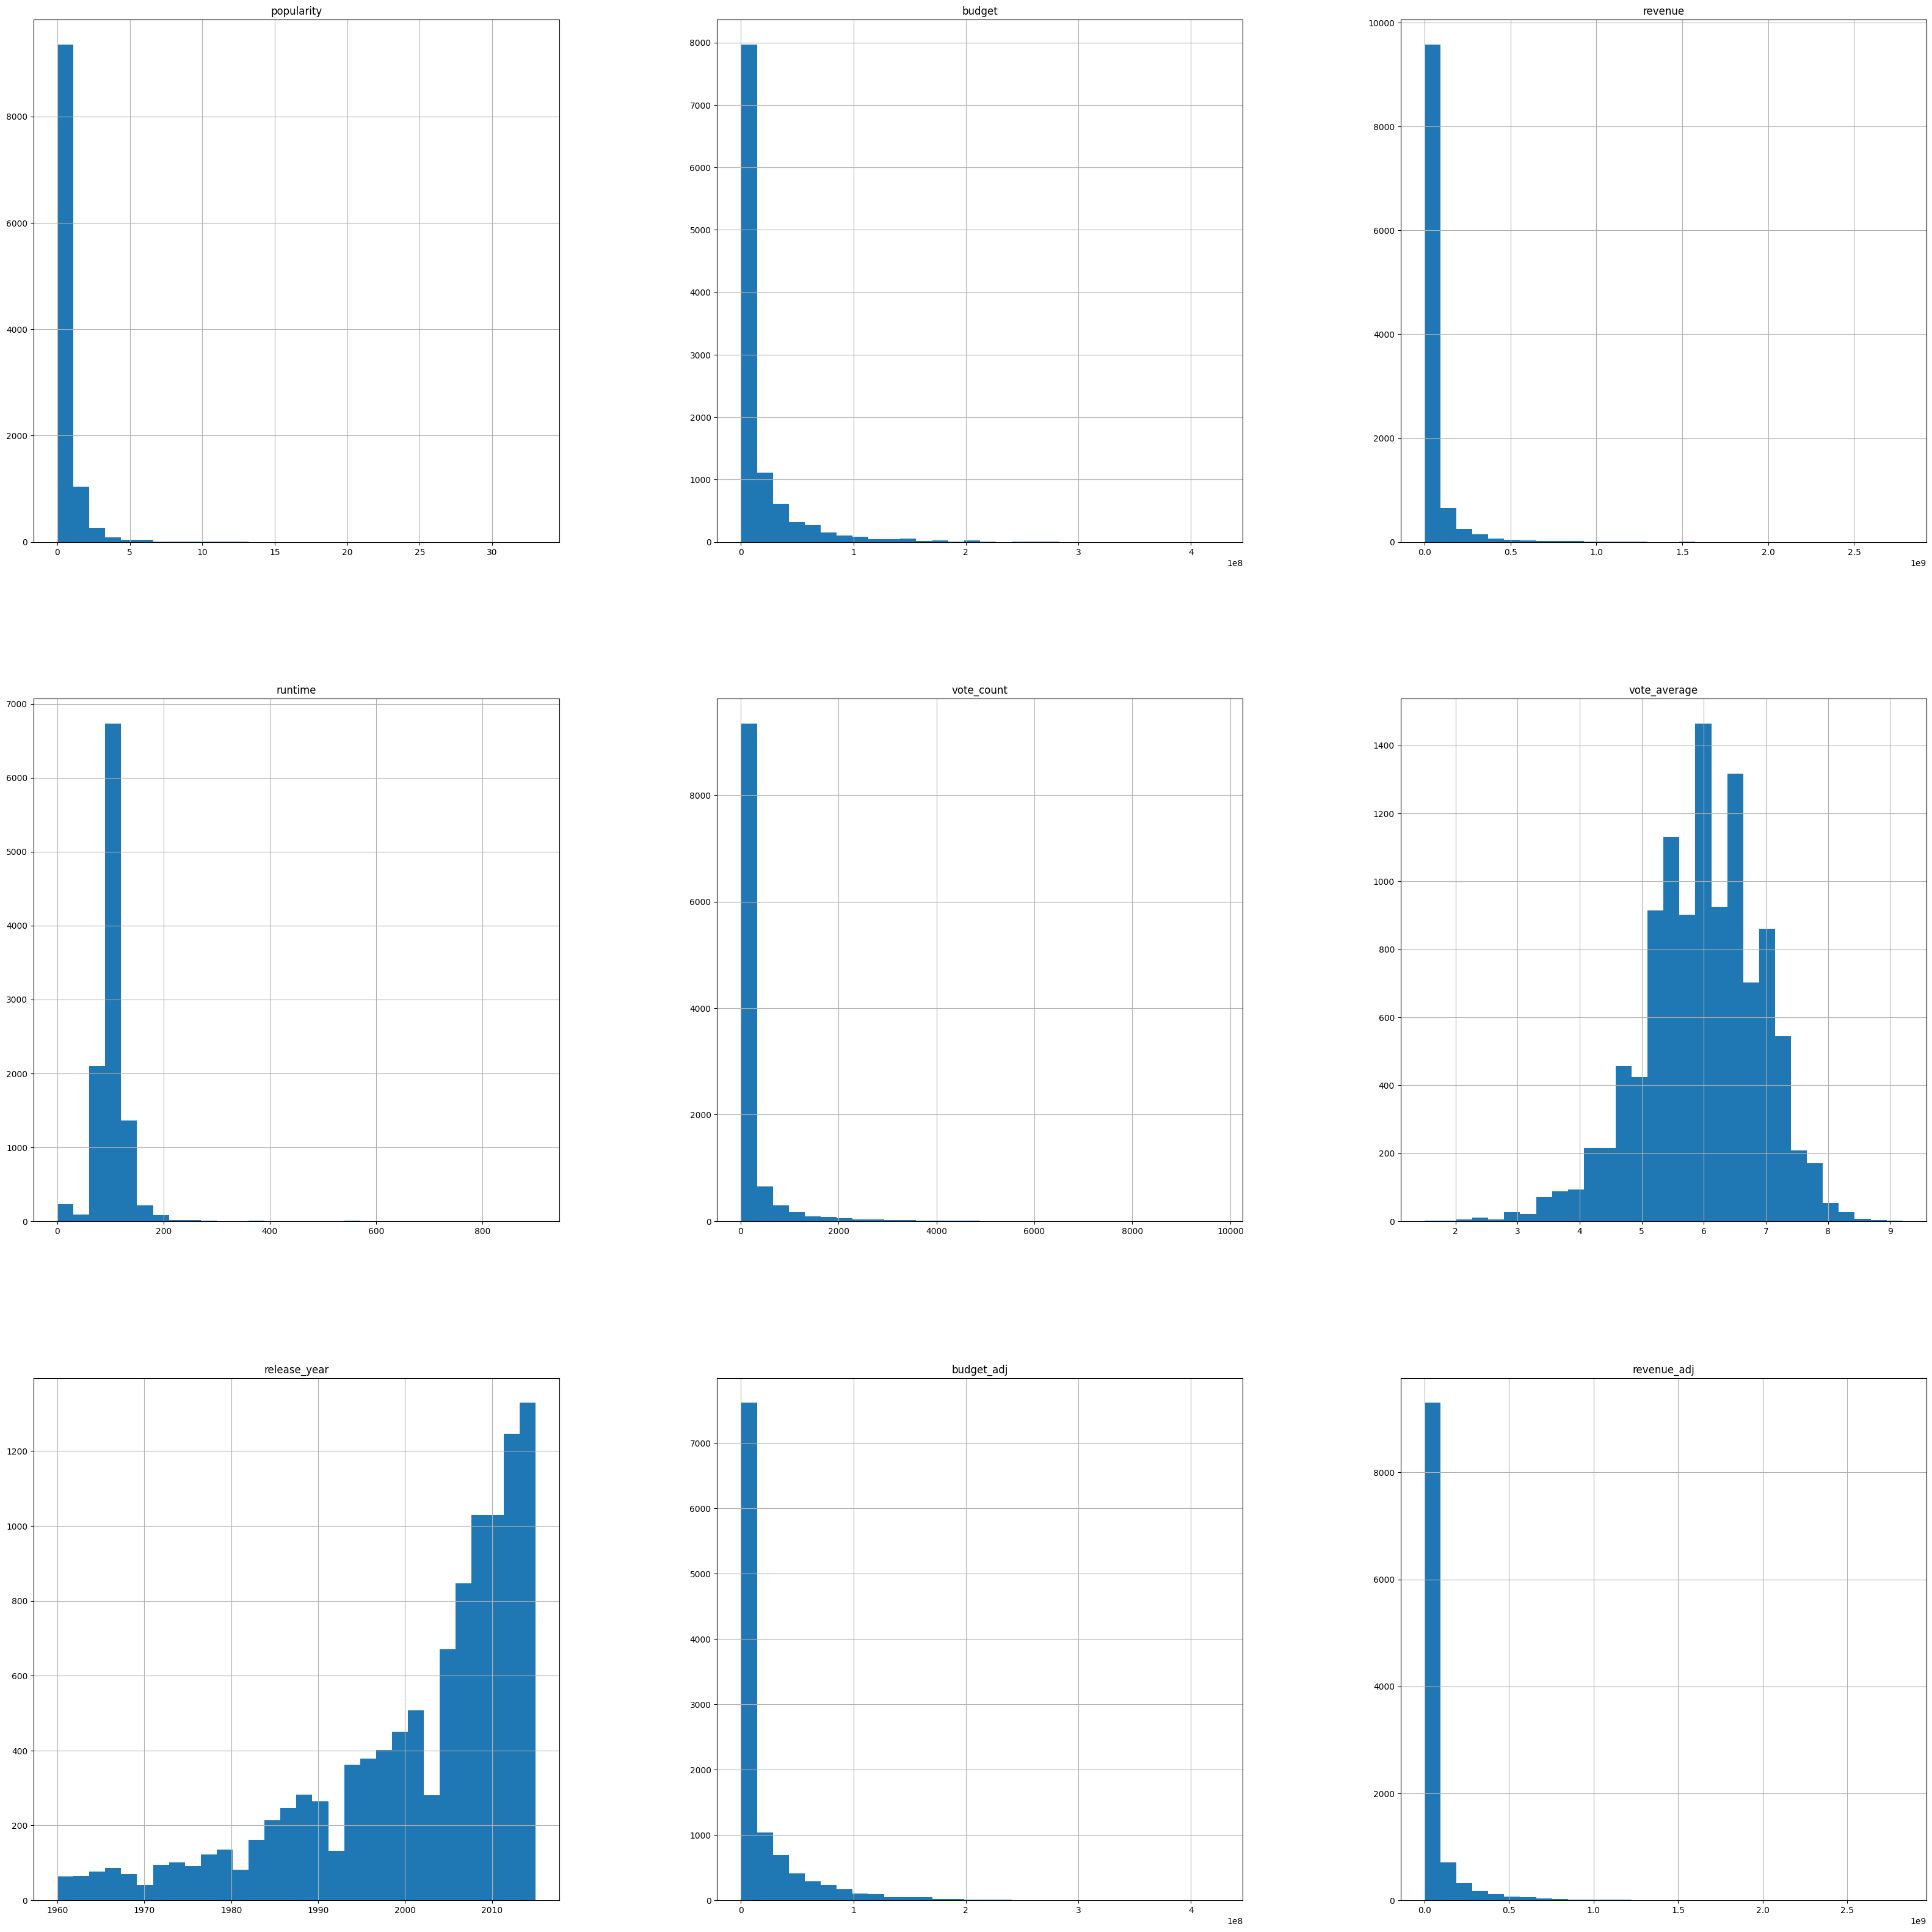

In [13]:
plt.rcParams["figure.figsize"] = (40, 40)
df_num.hist(bins=30)

In [14]:
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_1,genres_2,genres_3,genres_4,genres_5
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,None,None
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,11,7.4,1966,0.000000e+00,0.000000e+00,Documentary,None,None,None,None
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,20,5.7,1966,0.000000e+00,0.000000e+00,Action,Adventure,Drama,None,None
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,11,6.5,1966,0.000000e+00,0.000000e+00,Mystery,Comedy,None,None,None
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,22,5.4,1966,0.000000e+00,0.000000e+00,Action,Comedy,None,None,None


/var/folders/y1/lcpdlr2n1d18r19vy7q62kyw0000gn/T/ipykernel_25135/3328745557.py:2: FutureWarning: `sort_columns` is deprecated and will be removed in a future version.
  df.groupby('genres_1').overview.count().sort_values(ascending=False).plot.bar(ylim=0, sort_columns=True)


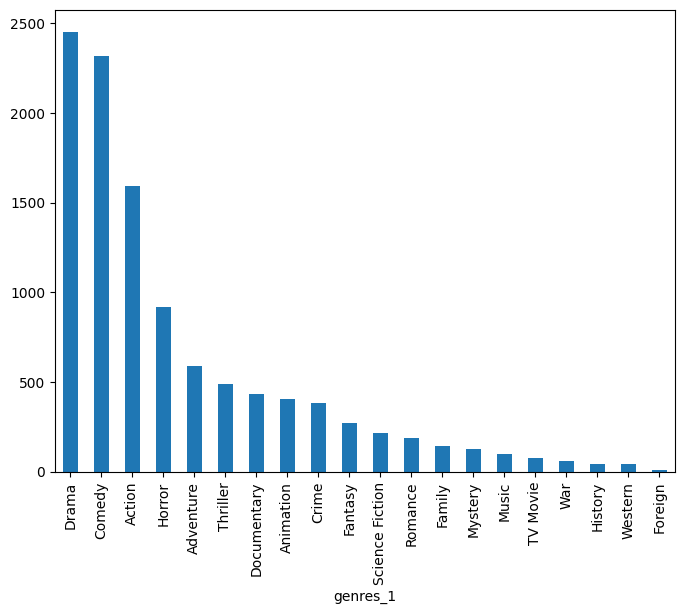

In [15]:
fig = plt.figure(figsize=(8,6))
df.groupby('genres_1').overview.count().sort_values(ascending=False).plot.bar(ylim=0, sort_columns=True)
plt.show()

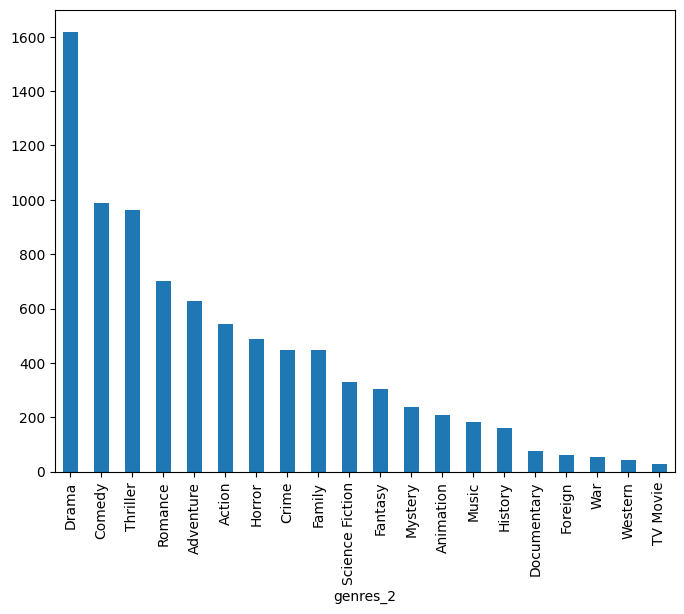

In [16]:
fig = plt.figure(figsize=(8,6))
df.groupby('genres_2').overview.count().sort_values(ascending=False).plot.bar(ylim=0)
plt.show()

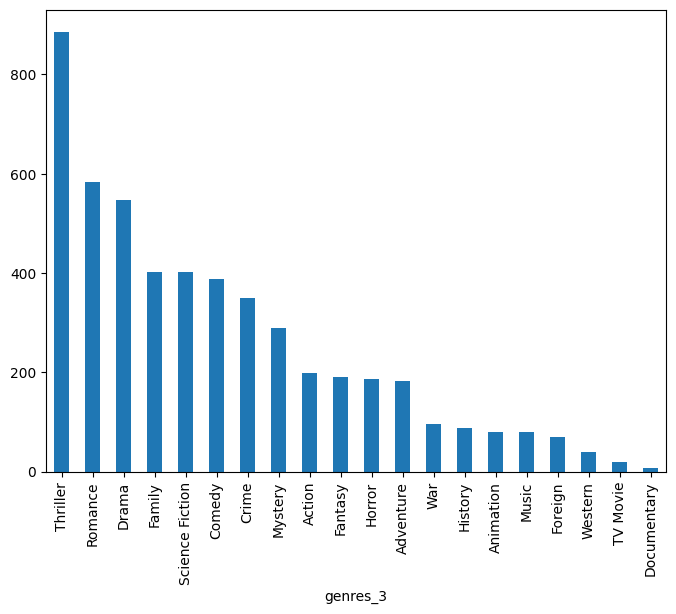

In [17]:
fig = plt.figure(figsize=(8,6))
df.groupby('genres_3').overview.count().sort_values(ascending=False).plot.bar(ylim=0)
plt.show()

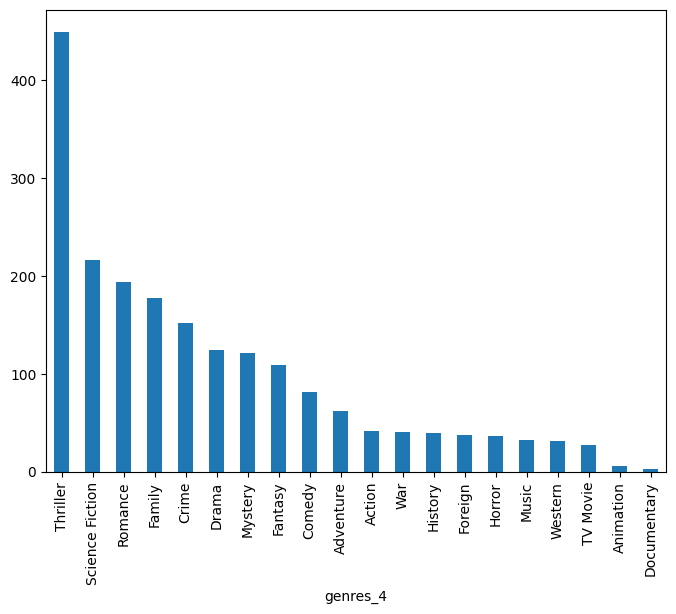

In [18]:
fig = plt.figure(figsize=(8,6))
df.groupby('genres_4').overview.count().sort_values(ascending=False).plot.bar(ylim=0)
plt.show()

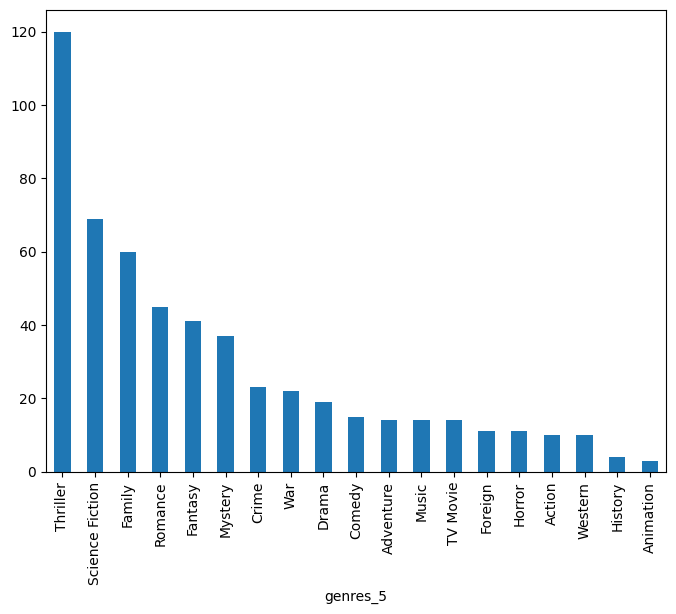

In [19]:
fig = plt.figure(figsize=(8,6))
df.groupby('genres_5').overview.count().sort_values(ascending=False).plot.bar(ylim=0)
plt.show()

In [20]:
# Total genres visualization
df['genres']
genre_list = []

for genre_string in df['genres']:
    if pd.isna(genre_string):
        continue
    movie_genres = genre_string.split('|')
    for g in movie_genres:
        genre_list.append(g)

In [21]:
s = pd.Series(genre_list)
value_counts = s.value_counts()
df_genre_count = pd.DataFrame({'Genre': value_counts.index, 'Count': value_counts.values})
df_top10 = df_genre_count.nlargest(10, 'Count')[['Genre', 'Count']]

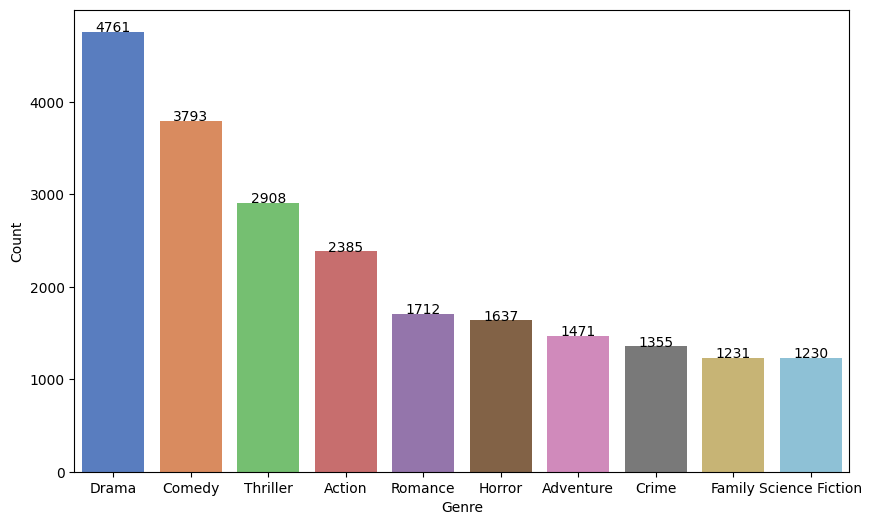

In [22]:
fig = plt.figure(figsize=(10,6))
sns.set_palette("muted")

ax = sns.barplot(data=df_top10, x='Genre', y='Count')

# Add numerical values to the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height()+0.5, int(p.get_height()), 
            ha='center', fontsize=10)
    
plt.show()

## Text Cleaning

In [26]:
import spacy
import re
import contractions
import unicodedata

nlp = spacy.load('en_core_web_sm')

In [35]:
for i, row in df.iterrows():
    if i % 1000 == 0:
        print(i)
#     if(row["overview"] and len(str(row["overview"])) < 1000000):
    if row["overview"]:
        
        # Remove special characters using regular expression
        clean_text = re.sub(r'[^\w\s]', '', str(row["overview"]))
        
        # Remove accent characters using the unicodedata module
        no_accent_text = ''.join(char for char in unicodedata.normalize('NFD', clean_text) if unicodedata.category(char) != 'Mn')
        
        # Expand contractions using contractions library
        expanded_text = contractions.fix(no_accent_text)
        
        doc = nlp(expanded_text)
        
        # Tokenization
        tokens = [token.text for token in doc]
#         print('tokens', tokens)
        
        # Stopword removal
        filtered_tokens = [token for token in doc if not token.is_stop]
#         print('filtered_tokens', filtered_tokens)
        
        # Lemmatization
        lemmas = [token.lemma_ for token in doc if not token.is_stop]
#         print('lemmas', lemmas)
        
        adjectives = []
        nouns = []
        verbs = []

        # Add part-of-speech (POS) tagging
        for token in filtered_tokens:
            if token.pos_ == "ADJ":
                adjectives.append(token.lemma_)
            if token.pos_ == "NOUN" or token.pos_ == "PROPN":
                nouns.append(token.lemma_)
            if token.pos_ == "VERB":
                verbs.append(token.lemma_)
                
        df.at[i, "overview_lemma"] = " ".join(lemmas)                
        df.at[i, "overview_nouns"] = " ".join(nouns)
        df.at[i, "overview_adjectives"] = " ".join(adjectives)
        df.at[i, "overview_verbs"] = " ".join(verbs)
        df.at[i, "overview_nav"] = " ".join(nouns+adjectives+verbs)
        df.at[i, "no_tokens"] = len(lemmas)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


## NLP Pre-processing

### Named Entity Recognition

In [37]:
for i, row in df.iterrows():
    if i % 1000 == 0:
        print(i)
    if row["overview"]:
        
        # Remove special characters using regular expression
        clean_text = re.sub(r'[^\w\s]', '', str(row["overview"]))
        
        # Remove accent characters using the unicodedata module
        no_accent_text = ''.join(char for char in unicodedata.normalize('NFD', clean_text) if unicodedata.category(char) != 'Mn')
        
        # Expand contractions using contractions library
        expanded_text = contractions.fix(no_accent_text)
        
        doc = nlp(expanded_text)
        
        person = []
        org = []
        gpe = [] # geopolitical entity
        date = []
        time = []
        money = []

        # Named entity recognition
        for ent in doc.ents:
#             print(ent.text, ent.label_)
            if ent.label_ == "PERSON":
                person.append(ent.text)
            if ent.label_ == "ORG":
                org.append(ent.text)
            if ent.label_ == "DATE":
                date.append(ent.text)
            if ent.label_ == "TIME":
                time.append(ent.text)
            if ent.label_ == "MONEY":
                money.append(ent.text)
            if ent.label_ == "GPE":
                gpe.append(ent.text)
                
        df.at[i, "overview_person"] = " ".join(person)                
        df.at[i, "overview_org"] = " ".join(org)
        df.at[i, "overview_date"] = " ".join(date)
        df.at[i, "overview_time"] = " ".join(time)
        df.at[i, "overview_money"] = " ".join(money)
        df.at[i, "overview_gpe"] = " ".join(gpe)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


In [38]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview_adjectives,overview_verbs,overview_nav,no_tokens,overview_person,overview_org,overview_date,overview_time,overview_money,overview_gpe
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,twentytwo,feature function envision,year event Jurassic Park Isla Nublar dinosaur ...,19.0,John Hammond,,Twentytwo years,,,Jurassic
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,apocalyptic furth stark able childhood,set break craze fight exist restore seek follo...,story reach planet desert landscape humanity n...,47.0,Max,Furiosa,,,,
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,inner powerful,confront continue threaten tear,Beatrice Prior demon fight alliance society in...,13.0,Beatrice Prior,,,,,
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,new evil,defeat face,year Galactic Empire Han Solo ally threat Kylo...,16.0,,Stormtroopers,Thirty years,,,
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,comatose,seek,Deckard Shaw revenge Dominic Toretto family br...,9.0,Deckard Shaw Dominic Toretto,,,,,


In [118]:
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview_adjectives,overview_verbs,overview_nav,no_tokens,overview_person,overview_org,overview_date,overview_time,overview_money,overview_gpe
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,twentytwo,feature function envision,year event Jurassic Park Isla Nublar dinosaur ...,19.0,John Hammond,,Twentytwo years,,,Jurassic
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,apocalyptic furth stark able childhood,set break craze fight exist restore seek follo...,story reach planet desert landscape humanity n...,47.0,Max,Furiosa,,,,
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,inner powerful,confront continue threaten tear,Beatrice Prior demon fight alliance society in...,13.0,Beatrice Prior,,,,,
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,new evil,defeat face,year Galactic Empire Han Solo ally threat Kylo...,16.0,,Stormtroopers,Thirty years,,,
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,comatose,seek,Deckard Shaw revenge Dominic Toretto family br...,9.0,Deckard Shaw Dominic Toretto,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,influential american perfect endless,document travel surf,Endless Summer Bruce Brown surf movie time fil...,28.0,Bruce Brown Mike Hynson Robert August,The Endless Summer Californiaas,winter 1965,,,
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,,fire injure struggle recover begin drive start...,Grand Prix driver Pete Aron team crash Monaco ...,24.0,Pete Aron Scott Stoddard Stoddard Aron,,,,,Monaco
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,common good modern,moonlight steal sell steal give assign bring,insurance agent carthief car crook people car ...,23.0,,,,,,
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,comic japanese secret,take redubbe change revolve salad,Woody Allens film debut action film Internatio...,22.0,Woody Allens,,,,,


In [117]:
df.to_csv('../pre_processed_data.csv')

# Creating a List of Tokens from a List of Documents

In [39]:
def my_tokenizer(text):
    return text.split() if text != None else []

In [49]:
df['genres']

0        Action|Adventure|Science Fiction|Thriller
1        Action|Adventure|Science Fiction|Thriller
2               Adventure|Science Fiction|Thriller
3         Action|Adventure|Science Fiction|Fantasy
4                            Action|Crime|Thriller
                           ...                    
10861                                  Documentary
10862                       Action|Adventure|Drama
10863                               Mystery|Comedy
10864                                Action|Comedy
10865                                       Horror
Name: genres, Length: 10866, dtype: object

In [97]:
# transform list of documents into a single list of tokens
# tokens = df.overview_nouns.map(my_tokenizer).sum()
drama_tokens = df.apply(lambda row: row['overview_lemma'] if row['genres'] and 'Drama' in str(row['genres']) else '', axis=1)
drama_tokens = drama_tokens.sum()
drama_tokens = my_tokenizer(drama_tokens)

In [101]:
print(drama_tokens[:20])

['1820', 'frontiersman', 'Hugh', 'Glass', 'set', 'path', 'vengeance', 'leave', 'dead', 'bear', 'maulman', 'mission', 'Mars', 'Astronaut', 'Mark', 'Watney', 'presume', 'dead', 'fierce', 'storm']


In [102]:
drama_counter = Counter(drama_tokens)
counter.most_common(20)

[('life', 2042),
 ('man', 1425),
 ('friend', 1248),
 ('family', 1155),
 ('world', 1085),
 ('story', 1060),
 ('year', 1034),
 ('film', 971),
 ('woman', 898),
 ('love', 857),
 ('time', 834),
 ('way', 743),
 ('father', 712),
 ('girl', 706),
 ('school', 618),
 ('town', 604),
 ('group', 598),
 ('New', 593),
 ('day', 590),
 ('wife', 577)]

In [108]:
# transform list of documents into a single list of tokens
# tokens = df.overview_nouns.map(my_tokenizer).sum()
drama_locations = df.apply(lambda row: row['overview_org'] if row['genres'] and 'Drama' in str(row['genres']) else '', axis=1)
drama_locations = drama_locations.sum()
drama_locations = my_tokenizer(drama_locations)

In [109]:
len(drama_locations)

2610

In [110]:
print(drama_locations[:20])

['Nathan', 'CalebThe', 'Boston', 'Globe', 'Catholic', 'Archdiocese', 'Catholic', 'ChurchCIAFBI', 'FBIStraight', 'Outta', 'Compton', 'NWAAdaline', 'AdalineMargoMichelinFBI', 'CIAApollo', 'Creedthe', 'World', 'Trade', 'CenterFBI', 'MafiaSATFBIFBIAnnieMadras', 'India']


In [111]:
drama_location_counter = Counter(drama_locations)
drama_location_counter.most_common(20)

[('the', 88),
 ('of', 42),
 ('The', 21),
 ('US', 16),
 ('and', 14),
 ('University', 12),
 ('New', 12),
 ('Army', 11),
 ('York', 10),
 ('High', 10),
 ('National', 9),
 ('FBI', 9),
 ('Air', 9),
 ('White', 9),
 ('World', 8),
 ('Royal', 8),
 ('de', 7),
 ('Police', 6),
 ('League', 6),
 ('Disney', 6)]

In [115]:
df_output = df[['genres', 'overview_person', 'overview_org', 'overview_date', 
                'overview_time', 'overview_money', 'overview_gpe', 'overview_lemma',
               'overview_nouns', 'overview_adjectives', 'overview_verbs', 'overview_nav', 'no_tokens']]

In [46]:
# from spacy.lang.en.stop_words import STOP_WORDS

# def remove_stopwords(tokens):
#     """Remove stopwords from a list of tokens."""
#     return [t for t in tokens if t not in STOP_WORDS]

# # rebuild counter
# counter = Counter(remove_stopwords(tokens))

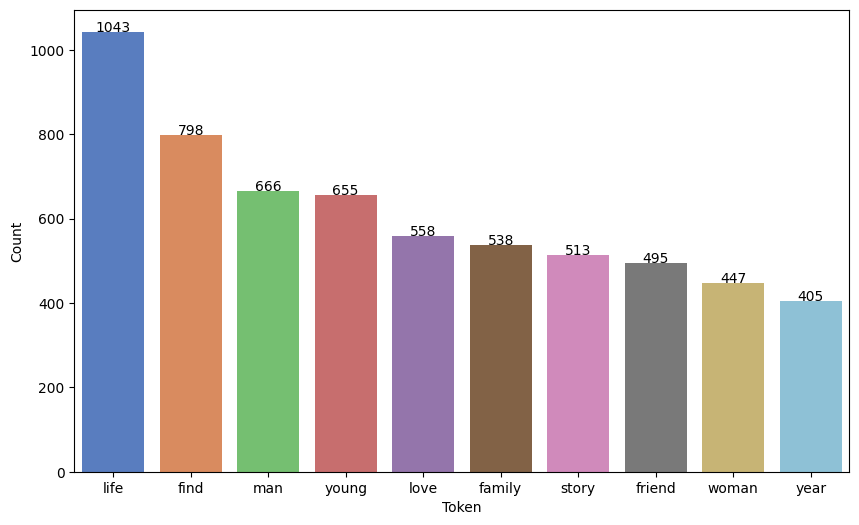

In [104]:
# convert list of tuples into data frame
drama_freq_df = pd.DataFrame.from_records(drama_counter.most_common(10),
                                    columns=['Token', 'Count'])

# create bar plot
# freq_df.plot(kind='bar', x='token');

fig = plt.figure(figsize=(10,6))
sns.set_palette("muted")

ax = sns.barplot(data=drama_freq_df, x='Token', y='Count')

# Add numerical values to the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height()+0.5, int(p.get_height()), 
            ha='center', fontsize=10)
    
plt.show()

In [ ]:
# nlp.Defaults.stop_words.add("TM")

In [ ]:
# print(nlp.Defaults.stop_words)

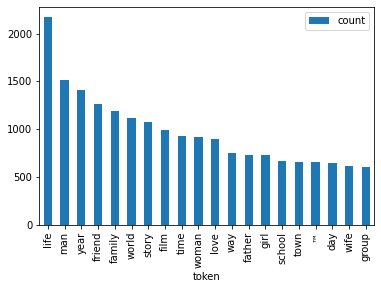

In [ ]:
# # convert list of tuples into data frame
# freq_df = pd.DataFrame.from_records(counter.most_common(20),
#                                     columns=['token', 'count'])

# # create bar plot
# freq_df.plot(kind='bar', x='token');

# Using Word Clouds

In [105]:
from wordcloud import WordCloud

def wordcloud(counter):
    """A small wordloud wrapper"""
    wc = WordCloud(width=1200, height=800, 
                   background_color="white", 
                   max_words=200) 
    wc.generate_from_frequencies(counter)

    # Plot
    fig=plt.figure(figsize=(8, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

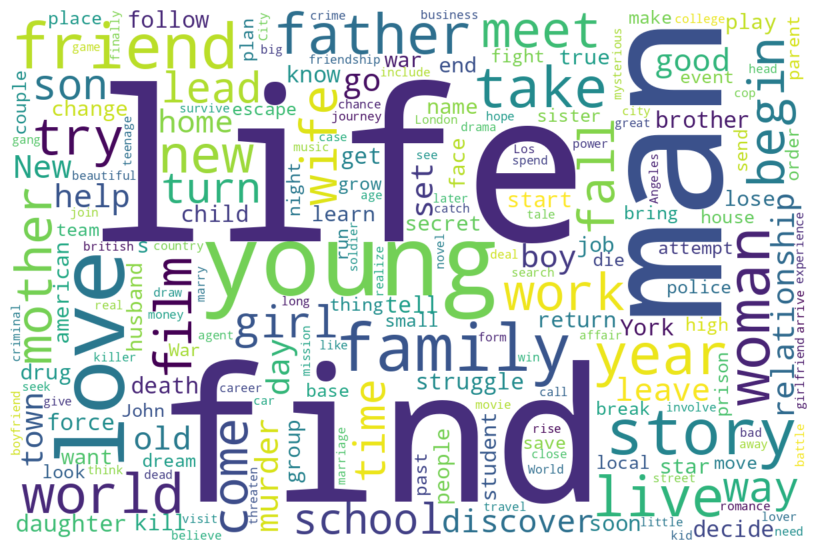

In [106]:
# create wordcloud
wordcloud(drama_counter)

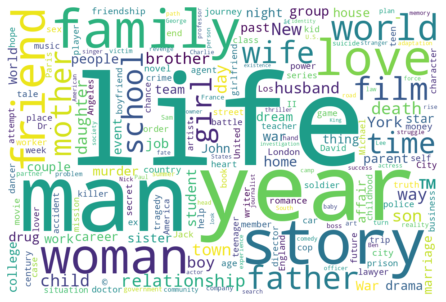

In [ ]:
tokens2 = df[df['genres_1']=='Drama'].overview_nouns \
         .map(my_tokenizer).sum()

counter2 = Counter(remove_stopwords(tokens2))
wordcloud(counter2)

# Exploring Text Complexity

In [ ]:
df['no_tokens'] = df.overview_lemma\
  .map(lambda l: 0 if l==None else len(l.split()))

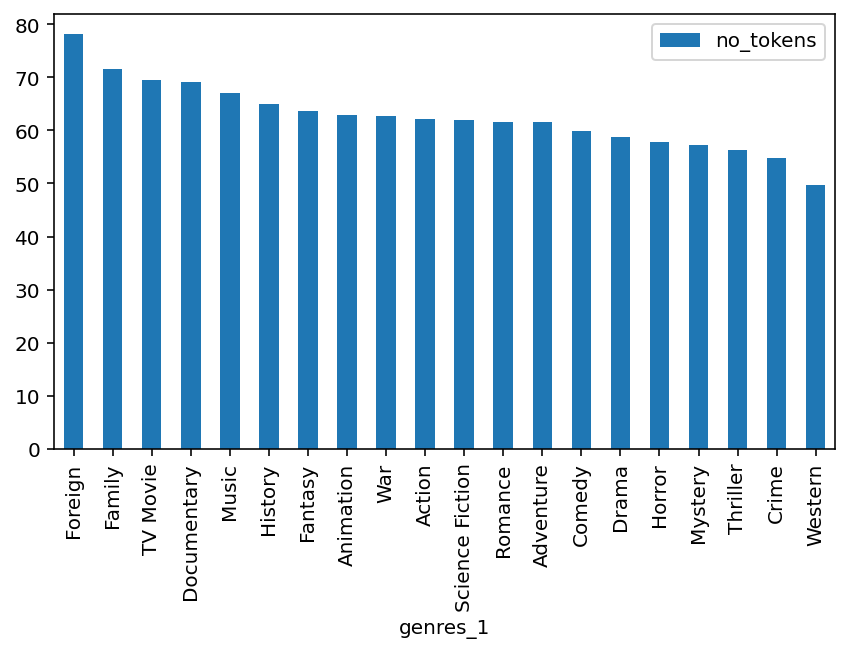

In [ ]:
# mean number of tokens by category
df.groupby(['genres_1']) \
  .agg({'no_tokens':'mean'}) \
  .sort_values(by='no_tokens', ascending=False) \
  .plot(kind='bar', figsize=(7,4));

In [ ]:
# render plots as retina or png, because svg is very slow
%config InlineBackend.figure_format = 'retina'

import seaborn as sns

def multi_boxplot(data, x, y, ylim = None):
    '''Wrapper for sns boxplot with cut-off functionality'''
    # plt.figure(figsize=(30, 5))
    fig, ax = plt.subplots()
    plt.xticks(rotation=90) 

    # order boxplots by median
    ordered_values = data.groupby(x)[[y]] \
                         .median() \
                         .sort_values(y, ascending=False) \
                         .index
        
    sns.boxplot(x=x, y=y, data=data, palette='Set2', 
                order=ordered_values)

    fig.set_size_inches(11, 6)
    
    # cut-off y-axis at value ylim
    ax.set_ylim(0, ylim)

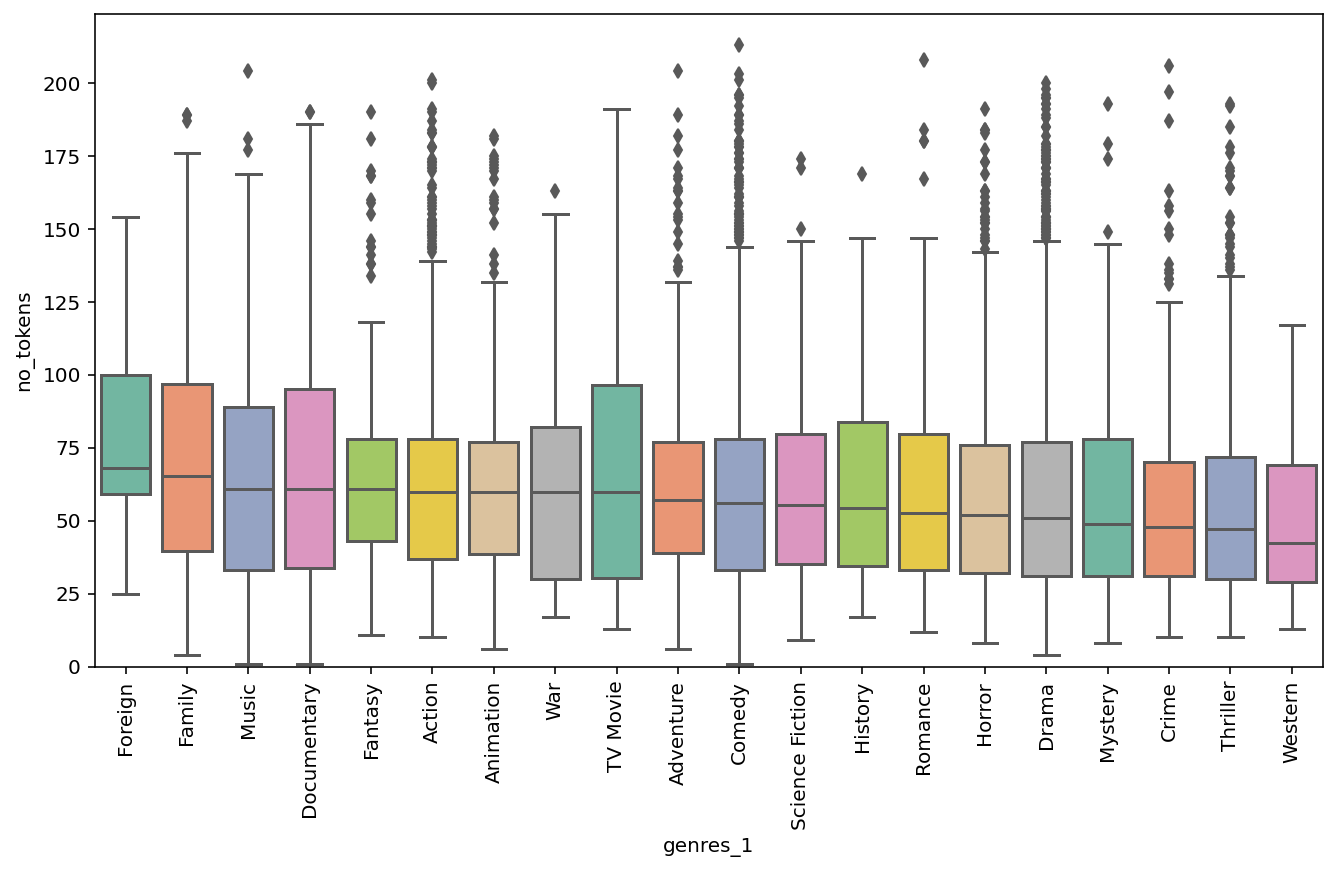

In [ ]:
multi_boxplot(df, 'genres_1', 'no_tokens');

In [ ]:
# print text of outliers
df['overview_lemma'][df.no_tokens > 175]

160      Leah Vaughn appear to have the ideal life . sh...
435      with Christmas only a few day away , Paige Sum...
451      after narrowly escape an ancient burial ground...
495      it be not easy be a teenager and Mike , a sixt...
614      Steven Ray be never quite normal . but when tr...
                               ...                        
9899     Kelly , a prostitute who want to transform her...
9921     aged and wealthy Charlotte Hollis have live al...
9965     Henry Graham be a man with a problem : he have...
10545    Harry Doyle ( Lancaster ) and Archie Lang ( Do...
10678    this documentary of the Rolling Stones ' 1969 ...
Name: overview_lemma, Length: 92, dtype: object

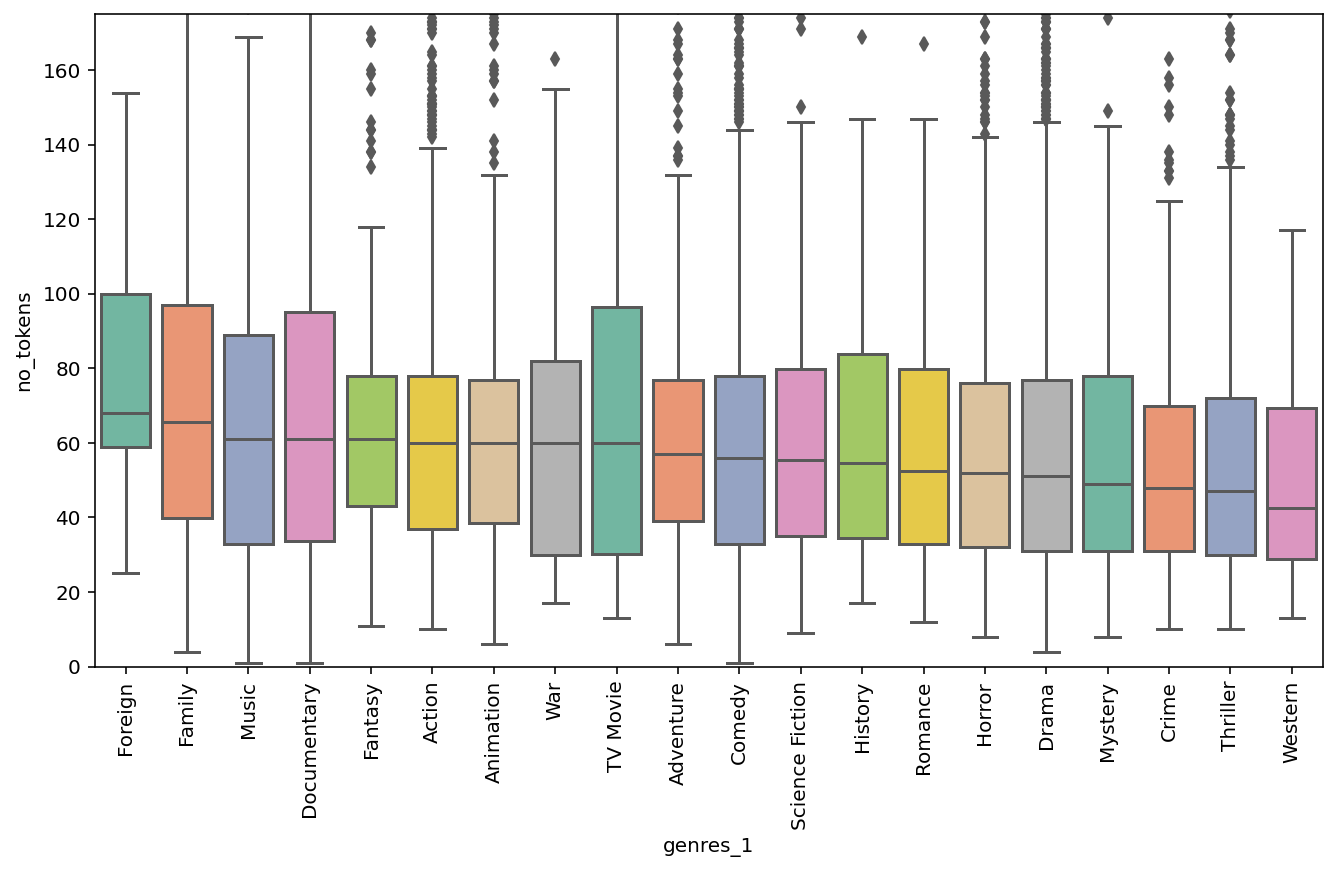

In [ ]:
# cut-off diagram at y=175
multi_boxplot(df, 'genres_1', 'no_tokens', ylim=175)